In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2)) #模拟100个样本 每个样本有2个特征
X[:,0] = np.random.uniform(0., 100., size=100) #随机生成X矩阵的第一列，范围在[0,100)，间隔相等
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100) #生成X矩阵第二列，并添加上均值为0，方差为10的浮点数作为干扰

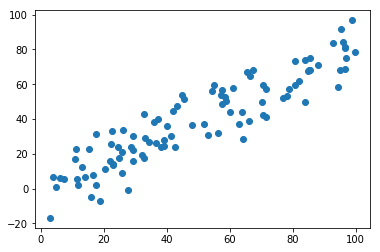

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0) #axis=0,压缩行，求各列的均值

In [5]:
X_demean = demean(X)

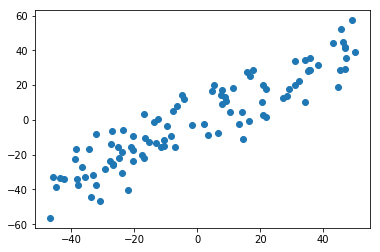

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [7]:
np.mean(X_demean[:,0])

-2.4584778657299466e-14

In [8]:
np.mean(X_demean[:,1])

-1.637801005927031e-14

### 梯度上升法

In [9]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)

def df_math(w, X):
    return 2. * X.T.dot(X.dot(w)) / len(X)

def df_debug(w, X, epsilon = 0.0001): #epsilon取这么小的原因是，w是单位向量，模长为1。所以向量值很小，对应epsilon应该也要取的小一些
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon) #因为w1和w2只在i这个位置上的元素有变化，所以其他位置经过相减的运算都为0
    return res



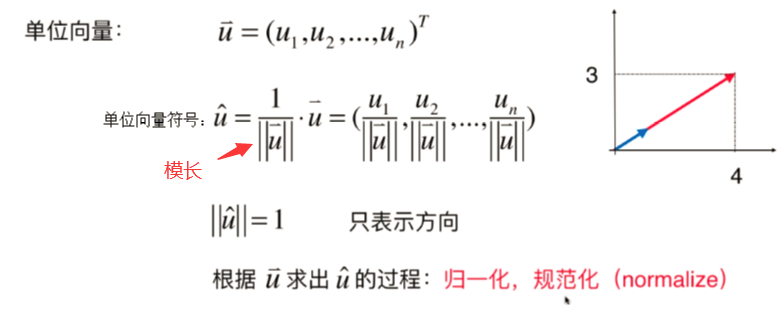

In [ ]:
def direction(w):
    return w / np.linalg.norm(w) #np.linalg.norm() 返回的是模长

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    